In [48]:
import akshare as ak
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import talib
import numpy as np
from matplotlib.font_manager import FontProperties
import os
import mplfinance as mpf 
import importlib
import utils
importlib.reload(utils)

%matplotlib inline
# 添加字体
matplotlib.rcParams['axes.unicode_minus']=False # 如果不加入下面这一句，会导致负号无法显示
plt.rcParams["font.sans-serif"] = ["SimHei"]

# 思路

参考这个[定投视频](https://www.bilibili.com/video/BV1TA411x77e)，把握大盘的下跌，越跌越投，

需要一下参数：
- 基准：上证指数、上证50、沪深300、中证500、中证1000
- 投资标的：指数ETF、各类股票基金 880
- 加建仓比例

# 获得上证指数
指数代码：https://q.stock.sohu.com/cn/zs.shtml

- SH000001: 上证指数
- SH000300: 沪深300
- SH000016：上证50
- SH000905：中证500
- SH000906：中证800
- SH000852：中证1000

In [49]:
index_code = "sh000905"
index_file = f"{index_code}.csv"
df_stock_index = ak.stock_zh_index_daily(symbol=index_code)
print(df_stock_index)

            date      open      high       low     close       volume
0     2005-01-04   996.682   996.682   984.795   986.927    232376203
1     2005-01-05   986.570  1008.855   985.677  1003.633    348610113
2     2005-01-06  1003.490  1003.490   990.792   994.595    293390559
3     2005-01-07   993.434  1009.000   990.446   997.606    339162698
4     2005-01-10   996.928  1006.457   993.123  1006.337    294940533
...          ...       ...       ...       ...       ...          ...
4345  2022-11-22  6178.163  6196.196  6100.113  6125.400  11608602400
4346  2022-11-23  6114.269  6140.114  6045.024  6115.605  11519351700
4347  2022-11-24  6126.598  6149.960  6099.750  6120.066  10020069900
4348  2022-11-25  6095.126  6107.073  6062.003  6087.859  10774234500
4349  2022-11-28  5999.855  6059.016  5970.086  6055.284  11794010700

[4350 rows x 6 columns]


      Unnamed: 0       date      open      high       low     close  \
0              0 2005-01-04   996.682   996.682   984.795   986.927   
1              1 2005-01-05   986.570  1008.855   985.677  1003.633   
2              2 2005-01-06  1003.490  1003.490   990.792   994.595   
3              3 2005-01-07   993.434  1009.000   990.446   997.606   
4              4 2005-01-10   996.928  1006.457   993.123  1006.337   
...          ...        ...       ...       ...       ...       ...   
4343        4343 2022-11-18  6213.091  6251.107  6181.554  6191.648   
4344        4344 2022-11-21  6147.717  6196.647  6116.296  6189.709   
4345        4345 2022-11-22  6178.163  6196.196  6100.113  6125.400   
4346        4346 2022-11-23  6114.269  6140.114  6045.024  6115.605   
4347        4347 2022-11-24  6126.598  6149.960  6099.750  6120.066   

           volume  
0       232376203  
1       348610113  
2       293390559  
3       339162698  
4       294940533  
...           ...  
4343  1

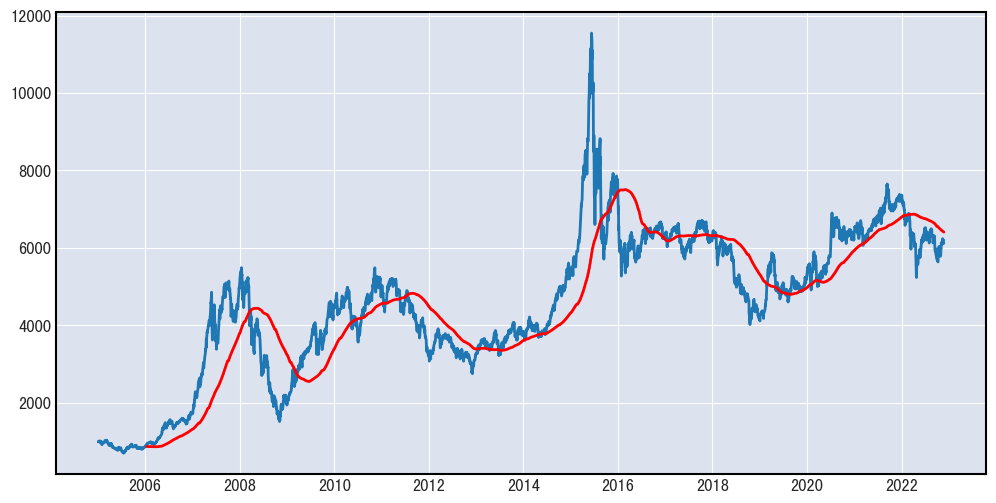

In [50]:
# 上证指数: 
# https://www.akshare.xyz/data/index/index.html#id1

index_code = "sh000905"
index_file = f"{index_code}.csv"
if not os.path.exists(index_file):
    df_stock_index = ak.stock_zh_index_daily(symbol=index_code)
    df_stock_index.to_csv(index_file)
else:
    df_stock_index = pd.read_csv(index_file)
    df_stock_index['date'] = pd.to_datetime(df_stock_index['date'], format='%Y-%m-%d')
print(df_stock_index)


df_stock_index['ma'] = talib.SMA(df_stock_index.close, timeperiod=250)

plt.figure(figsize=(12,6))
plt.plot(df_stock_index.date,df_stock_index.close)
plt.plot(df_stock_index.date,df_stock_index.ma,color='r')

# 获得某只基金的累计净值

开放式基金-历史数据
接口: fund_open_fund_info_em
https://akshare.akfamily.xyz/data/fund/fund_public.html#id6

      Unnamed: 0       净值日期   累计净值
0              0 2015-01-30  1.000
1              1 2015-02-06  0.993
2              2 2015-02-13  1.015
3              3 2015-02-17  1.019
4              4 2015-02-27  1.019
...          ...        ...    ...
1884        1884 2022-11-18  2.538
1885        1885 2022-11-21  2.529
1886        1886 2022-11-22  2.475
1887        1887 2022-11-23  2.403
1888        1888 2022-11-24  2.436

[1889 rows x 3 columns]


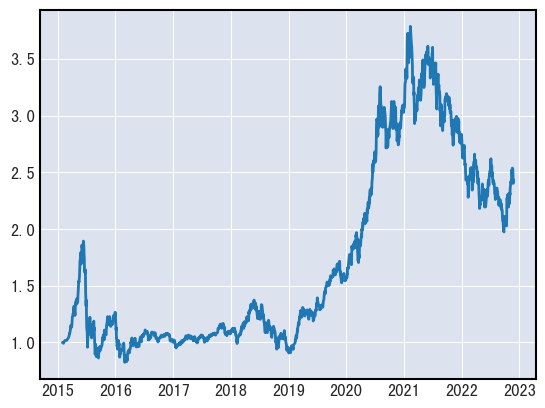

In [51]:
fund_code = "000960"

fund_file = f"{fund_code}.csv"

if not os.path.exists(f"{fund_code}.csv"):
    df_fund = ak.fund_open_fund_info_em(fund=fund_code, indicator="累计净值走势")
    df_fund.to_csv(fund_file)
else:
    df_fund = pd.read_csv(fund_file)
    df_fund['净值日期'] = pd.to_datetime(df_fund['净值日期'], format='%Y-%m-%d')


print(df_fund)
plt.plot(df_fund['净值日期'],df_fund['累计净值'])

# 基金的数据分析

/Users/piginzoo/softwares/py3/lib/python3.9/site-packages/mplfinance/_styles.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style['base_mpl_style'])


<Mpf_Figure size 1200x800 with 0 Axes>

/Users/piginzoo/softwares/py3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/piginzoo/softwares/py3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/piginzoo/softwares/py3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/piginzoo/softwares/py3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/piginzoo/softwares/py3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 36208 (\N{CJK UNIFIED I

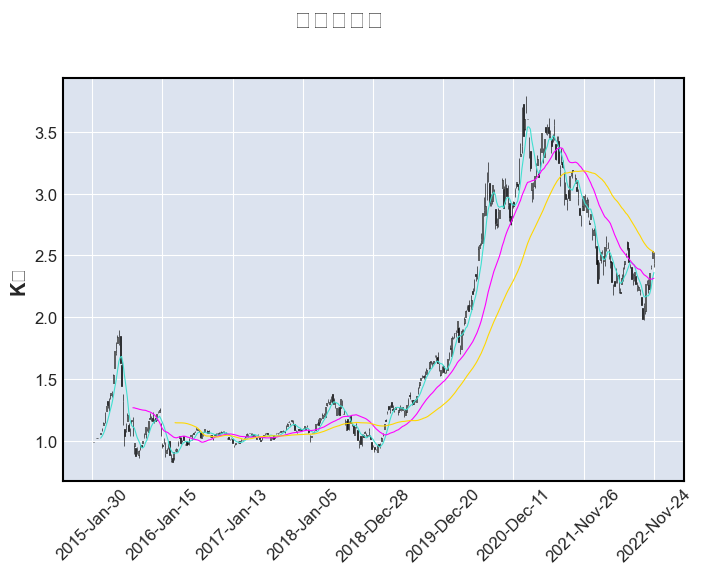

date
2015-01-30         NaN
2015-02-06         NaN
2015-02-13         NaN
2015-02-17         NaN
2015-02-27         NaN
                ...   
2022-10-28    0.107441
2022-11-04    0.108719
2022-11-11    0.106483
2022-11-18    0.107909
2022-11-24    0.109263
Length: 401, dtype: float64

In [56]:

df_day = df_fund.rename(columns={'净值日期':'date','累计净值':'close'})
df_day['high'] = df_day.close
df_day['low'] = df_day.close
df_day['open'] = df_day.close
df_day['volume'] = 100
df_day = df_day.set_index('date')
df_day


df = df_week  = utils.day2week(df_day)

df['atr'] = talib.ATR(df.high, df.low, df.close, timeperiod=20)


#实现画多图:https://codeantenna.com/a/r9SBCXdEok
# https://blog.csdn.net/qq_41437512/article/details/105319421

from cycler import cycler# 用于定制线条颜色

# 设置基本参数
# type:绘制图形的类型，有candle, renko, ohlc, line等
# 此处选择candle,即K线图
# mav(moving average):均线类型,此处设置7,30,60日线
# volume:布尔类型，设置是否显示成交量，默认False
# title:设置标题
# y_label:设置纵轴主标题
# y_label_lower:设置成交量图一栏的标题
# figratio:设置图形纵横比
# figscale:设置图形尺寸(数值越大图像质量越高)
kwargs = dict(
    type='candle', 
    mav=(7, 30, 60), 
    volume=False, 
    title='基金的走势',    
    ylabel='K线', 
    ylabel_lower='', 
    figratio=(15, 10))


# 设置marketcolors
# up:设置K线线柱颜色，up意为收盘价大于等于开盘价
# down:与up相反，这样设置与国内K线颜色标准相符
# edge:K线线柱边缘颜色(i代表继承自up和down的颜色)，下同。详见官方文档)
# wick:灯芯(上下影线)颜色
# volume:成交量直方图的颜色
# inherit:是否继承，选填
mc = mpf.make_marketcolors(
    up='red', 
    down='green', 
    edge='i', 
    wick='i', 
    volume='in', 
    inherit=True)

# 设置图形风格
# gridaxis:设置网格线位置
# gridstyle:设置网格线线型
# y_on_right:设置y轴位置是否在右
s = mpf.make_mpf_style(
    gridaxis='both', 
    gridstyle='-.', 
    y_on_right=False, 
    marketcolors=mc)
    
# 设置均线颜色，配色表可见下图
# 建议设置较深的颜色且与红色、绿色形成对比
# 此处设置七条均线的颜色，也可应用默认设置
plt.rcParams['axes.prop_cycle'] = cycler(
    color=['dodgerblue', 'deeppink', 
    'navy', 'teal', 'maroon', 'darkorange', 
    'indigo'])

# 设置线宽
plt.rcParams['lines.linewidth'] = .5
# plt.style.use(style['base_mpl_style'])

fig = mpf.figure(style=s,figsize=(12,8))
# ax1 = fig.add_subplot(1,1,1)
mpf.plot(df, **kwargs) #简单画法

df_atr


In [60]:
df_day
df = df_week  = utils.day2week(df_day)
df['atr'] = talib.ATR(df.high, df.low, df.close, timeperiod=20)/5
df['diff'] = df.close - df.close.shift(1)
df

,Unnamed: 0,close,high,low,open,volume,pct_chg,atr,diff
date,,,,,,,,,
2015-01-30,0,1.000,1.000,1.000,1.000,100,NaN,NaN,NaN
2015-02-06,1,0.993,0.993,0.993,0.993,100,-0.007000,NaN,-0.007
2015-02-13,2,1.015,1.015,1.015,1.015,100,0.022155,NaN,0.022
2015-02-17,3,1.019,1.019,1.019,1.019,100,0.003941,NaN,0.004
2015-02-27,4,1.019,1.019,1.019,1.019,100,0.000000,NaN,0.000
...,...,...,...,...,...,...,...,...,...
2022-10-28,1869,2.226,2.311,2.195,2.259,500,-0.033854,0.021488,-0.078
2022-11-04,1874,2.358,2.358,2.225,2.225,500,0.059299,0.021744,0.132
2022-11-11,1879,2.403,2.422,2.392,2.392,500,0.019084,0.021297,0.045


# [网格交易](https://ke.qq.com/course/335450/2701031918345818)
- N：初始仓位，股数
- H：网格高度，这里取ATR，价格
- U：账户总额，资金额
- R：仓位风险，取6%，百分比

初始仓位 : N = U ✖️ R ➗ 9 H  = U ✖️ R ➗ 9 ATR

<div>
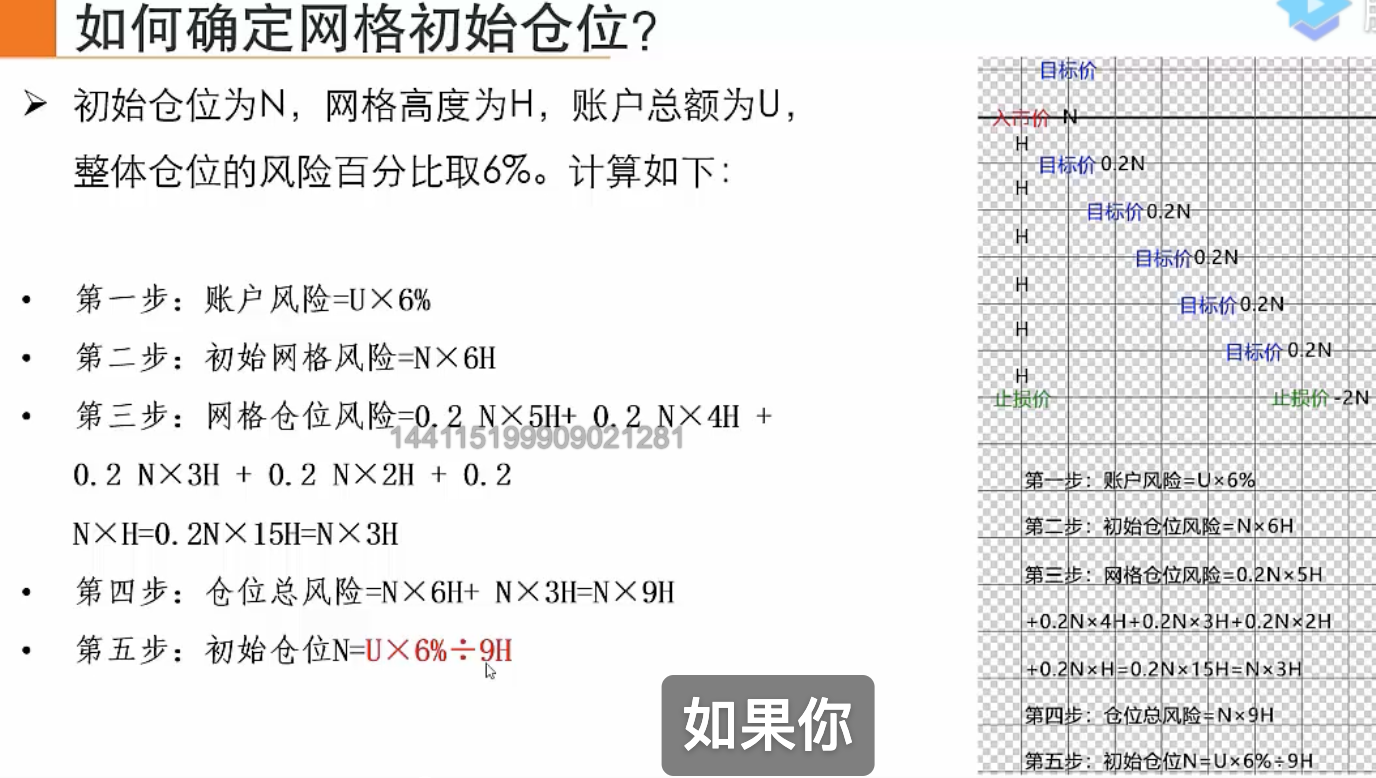
</div>

他用的是20%的，分成五个格子，下跌到第6个格子，止损，所以要计算各次加仓（20%*N）的不同筹码的风险，
累加起来恰好是3NH，再加上初始的仓位N，就是他说的**总风险是9NH**，也就是损失的最多的钱是这么多。

然后，总风险是9NH，总钱数是U，你最多风控是R，所以得到公式

$$ 
\begin{align}
U*R = 9NH  \\
N = \frac{U*R}{9H} = \frac{U*R}{9*ATR}
\end{align}
$$


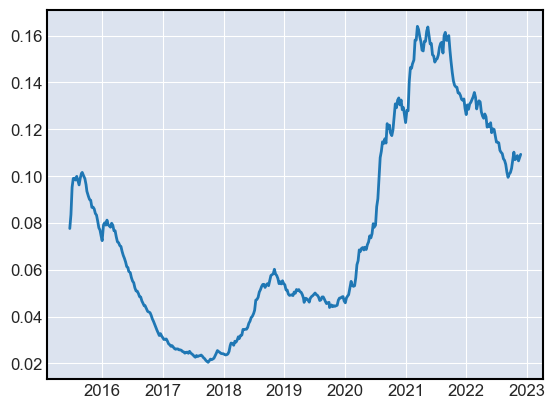

In [53]:
plt.plot(df_atr)
